### Name : Weerasinghe K.N.
### Index No : 190672T

In [21]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('dark_background')

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#### Question 1

> *Implement the intensity transformation depicted in Fig. 1a on the image shown in Fig. 1b*


Text(0.5, 1.0, 'Image after transformation')

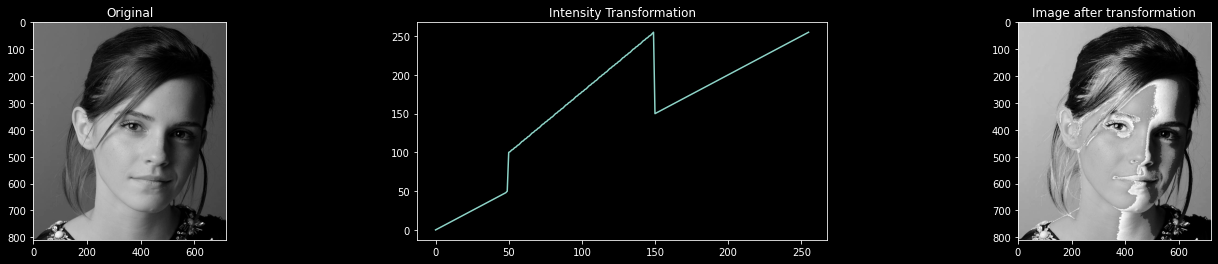

In [22]:
img = cv.imread("emma_gray.jpg",cv.IMREAD_GRAYSCALE)
assert img is not None

fig,ax = plt.subplots(1,3)
fig.set_figwidth(25)

t1=np.linspace(0,50,50)
t2=np.linspace(50,100,0)
t3=np.linspace(100,255,100)
t4=np.linspace(255,150,0)
t5=np.linspace(150,255,106)

t=np.concatenate((t1,t2,t3,t4,t5), axis=0).astype(np.uint8)
IT=cv.LUT(img,t)

ax[0].imshow(img,cmap="gray")
ax[0].set_title('Original')
ax[1].plot(t)
ax[1].set_title('Intensity Transformation')
ax[2].imshow(IT,cmap="gray")
ax[2].set_title('Image after transformation')

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#### Question 2

> *Apply a similar operation as above (question 1) to accentuate <br>(a) white matter<br>(b) gray matter<br>in the brain proton density image shown in Fig. 2. Show the intensity transformations as a plots.*

Text(0.5, 1.0, 'white matte')

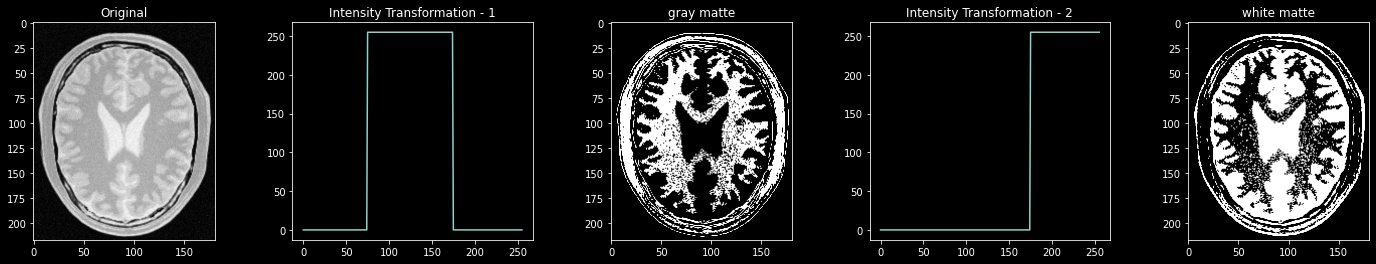

In [23]:
img = cv.imread("brain_proton_density_slice.png",cv.IMREAD_GRAYSCALE)
assert img is not None

fig,ax = plt.subplots(1,5)
fig.set_figwidth(25)

t11=np.linspace(0,0,75)
t12=np.linspace(255,255,100)
t13=np.linspace(0,0,81)
t21=np.linspace(0,0,175)
t22=np.linspace(255,255,81)

t1=np.concatenate((t11,t12,t13), axis=0).astype(np.uint8)
IT1=cv.LUT(img,t1)

t2=np.concatenate((t21,t22), axis=0).astype(np.uint8)
IT2=cv.LUT(img,t2)

ax[0].imshow(img,cmap="gray")
ax[0].set_title('Original')
ax[1].plot(t1)
ax[1].set_title('Intensity Transformation - 1')
ax[2].imshow(IT1,cmap="gray")
ax[2].set_title('gray matte')
ax[3].plot(t2)
ax[3].set_title('Intensity Transformation - 2')
ax[4].imshow(IT2,cmap="gray")
ax[4].set_title('white matte')

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#### Question 3

> *Consider the image shown in Fig. 3 <br>(a) Apply gamma correction to the L plane in the L∗a∗b∗ color space and state the γ value. <br>(b) Show the histograms of the original and corrected images.*

Text(0.5, 1.0, 'Histogram of the corrected image')

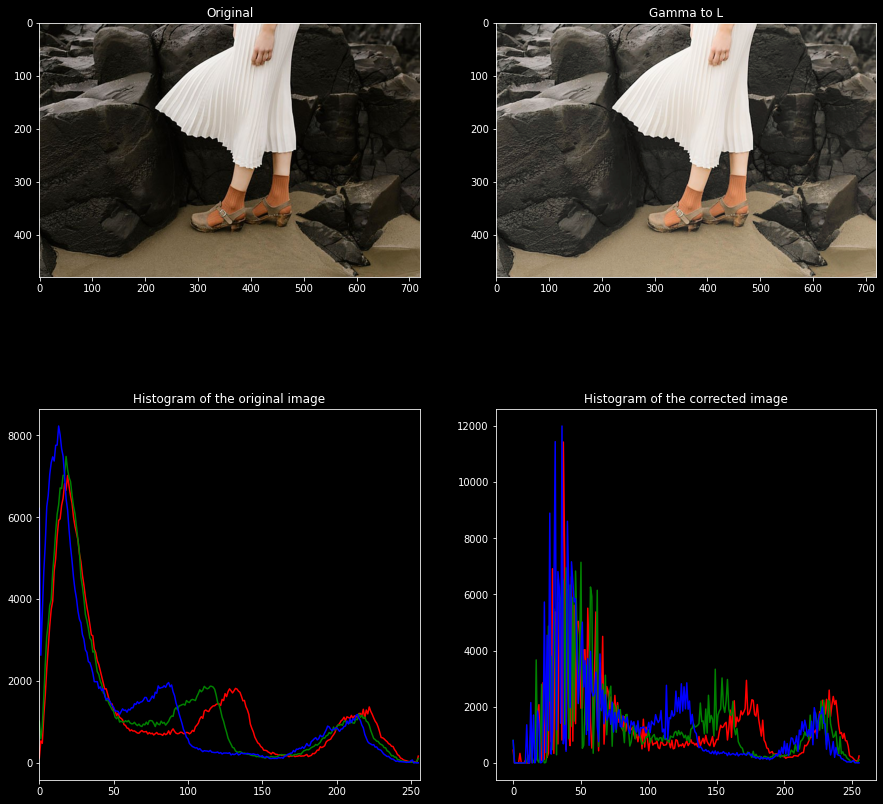

In [24]:
def gam_cor(img0,gamma):
    img_gam=np.array([(p/256)**gamma*256 for p in range (0,256)]).astype(np.uint8)
    gam=cv.LUT(img0,img_gam)
    return gam

img = cv.imread("highlights_and_shadows.jpg",cv.IMREAD_COLOR)
assert img is not None
img=cv.cvtColor(img,cv.COLOR_BGR2RGB) #color conversion
fig,ax = plt.subplots(2,2)
fig.set_figwidth(15)
fig.set_figheight(15)


ax[0][0].imshow(img)
ax[0][0].set_title('Original')

color=("r","g","b")

hist=[0,0,0]
for i,c in enumerate(color):
    hist=cv.calcHist([img],[i],None,[256],[0,256])
    ax[1][0].plot(hist,color=c)
    ax[1][0].set_xlim([0, 256])

ax[1][0].set_title('Histogram of the original image')

img=cv.cvtColor(img,cv.COLOR_RGB2LAB)
l,a,b=cv.split(img)
gamma=0.6

lg=gam_cor(l,gamma)
gimg=cv.merge([lg,a,b])
ax[0][1].imshow(cv.cvtColor(gimg, cv.COLOR_LAB2RGB))
ax[0][1].set_title('Gamma to L')

imgg=cv.cvtColor(gimg, cv.COLOR_LAB2RGB)
hist1=[0,0,0]
for i,c in enumerate(color):
    hist1=cv.calcHist([imgg],[i],None,[256],[0,256])
    ax[1][1].plot(hist1,color=c)

ax[1][1].set_title('Histogram of the corrected image')


----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#### Question 4

> *Write a function of your own to carry out histogram equalization on the image shown in Fig. 4. Show the histograms before and after equalization.*
